In [1]:
import networkx as nx
import pandas as pd
import re

coronavirus = pd.read_csv('#coronavirus_tweets_2_10.csv').drop('Unnamed: 0', axis=1)
wuhan = pd.read_csv('wuhan_tweets2-10.csv').drop('Unnamed: 0', axis=1)

tweets = coronavirus.append(wuhan).drop('date', axis=1).drop_duplicates()
tweets.head(5)

,username,to,text,retweets,favorites,mentions,hashtags,geo,newdate
0,ZeDaAT,ruralbusinessbr,Para quem ainda não sabe oque fazer em relação...,0,0,NaN,#coronavirus #PraCegoVer,NaN,2020-2-9
1,DiarioYaracuyVE,NaN,#9Feb| #Amazon no acudirá al Mobile World Cong...,0,0,NaN,#9Feb #Amazon #coronavirus #Barcelona,NaN,2020-2-9
2,FrancoisGallot,NaN,#Coronavirus : le bilan en #Chine monte à 902 ...,0,0,@BFMTV,#Coronavirus #Chine,NaN,2020-2-9
3,JuliasJam,theboringhandle,Been following #coronavirus closely since earl...,1,1,NaN,#coronavirus #coronavirus,NaN,2020-2-9
4,Sccp4x,AFP,40 mil infectados por #Coronavirus,0,1,NaN,#Coronavirus,NaN,2020-2-9


In [2]:
edges = tweets[['username','to']]
edges = edges.ffill(axis=1)
edges['text'] = tweets['text']

In [11]:
G = nx.convert_matrix.from_pandas_edgelist(edges, 'username','to', create_using=nx.DiGraph) 

In [12]:
betweenness = nx.betweenness_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)

In [15]:
betweenness_dict = {k: v*100000 for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)}

In [16]:
#{k: v for k, v in sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True)[:25]}

In [17]:
betweenness_df = pd.DataFrame(betweenness_dict.items())
betweenness_df.columns = ["Name","Betweenness"]
#betweenness_df.head()

In [2]:
classes = pd.read_csv('AllPeriod.csv')
#classes.head()

In [19]:
merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

In [20]:
merged_bet.groupby("Class")["Betweenness"].mean().sort_values(ascending=False)

Class
S    0.001939
N    0.001450
O    0.000000
Name: Betweenness, dtype: float64

In [23]:
degree_dict = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}

In [21]:
#{k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)[:25]}

In [22]:
#pd.DataFrame(degree_dict.items())

In [25]:
betweenness_df = pd.DataFrame(degree_dict.items())
betweenness_df.columns = ["Name","Degree"]

merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

print("degree")
merged_bet.groupby("Class")["Degree"].mean().sort_values(ascending=False)

degree


Class
N    0.001444
S    0.000414
O    0.000262
Name: Degree, dtype: float64

In [26]:
closeness_dict = {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)}

In [27]:
#{k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:25]}

In [28]:
#pd.DataFrame(closeness_dict.items())

In [29]:
betweenness_df = pd.DataFrame(closeness_dict.items())
betweenness_df.columns = ["Name","Closeness"]

merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

print("closeness")
merged_bet.groupby("Class")["Closeness"].mean().sort_values(ascending=False)

closeness


Class
N    0.001405
S    0.000249
O    0.000119
Name: Closeness, dtype: float64

### create graph network

In [3]:
merged_df = tweets.merge(classes, left_on = "username", right_on = "Name")

In [4]:
pd.set_option('display.max_rows', 500)
merged_df.shape

(62, 11)

In [5]:
clean_df = merged_df.ffill(axis = 1)
clean_df.shape

(62, 11)

In [6]:
G = nx.from_pandas_edgelist(clean_df, "username", "to", edge_attr = "retweets", create_using = nx.MultiGraph())

### color map: blue = news, green = scientist, black = other, grey = classified node tweets to someone unclassified 

In [7]:
color_map = []
num_nodes = []

def create_color_map(G):
    for node in G:
        num_nodes.append(node)
        #print(node)
        node_class = clean_df[clean_df["username"] == node]["Class"].unique()
        if len(node_class) == 1:
            if node_class[0] == "S":
                color_map.append("green")
            elif node_class[0] == "N":
                color_map.append("blue")
            else:
                color_map.append("black")
        if len(node_class) == 0:
            color_map.append("grey")
        #print(node_class)
        #print(len(node_class))
                
create_color_map(G)

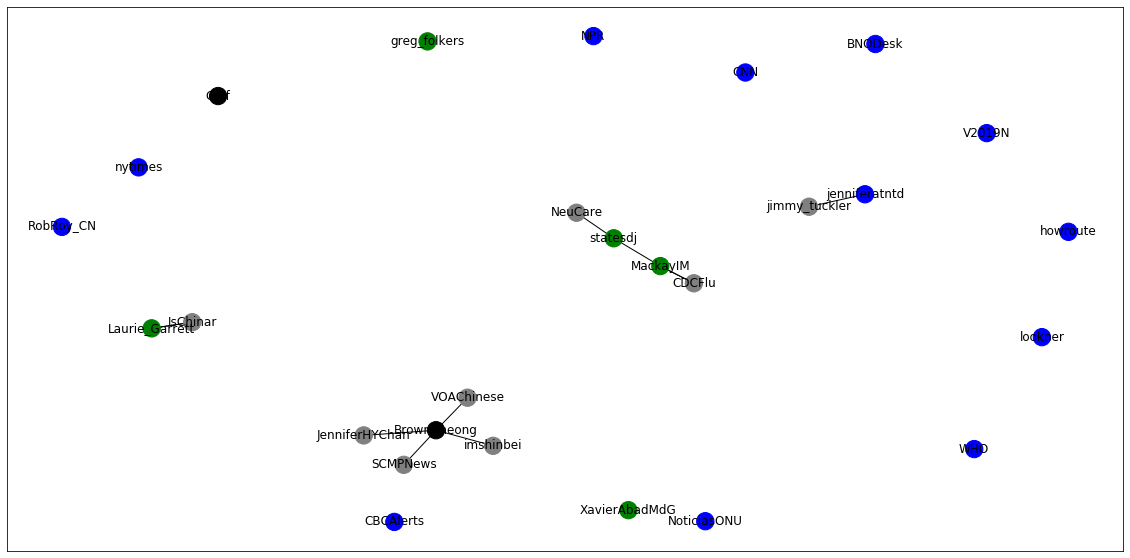

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,10))

pos = nx.spring_layout(G, iterations = 30)
nx.draw_networkx(G, pos, node_color=color_map)

plt.show()